In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt


In [3]:
stock=pd.read_csv("../../data/Stock Regression/Cleaned/TSLA Cleaned Data 2015-2024.csv")
test=pd.read_csv("../../data/Stock Regression/Cleaned/TSLA training data.csv")
#final=pd.read_csv("filename") once the test data is prepared

In [4]:
mean_open=test["Open"].mean()
test['Open'].fillna({'Open':mean_open},inplace=True)
mean_low=test['Low'].mean()
test['Low'].fillna({'Low':mean_low},inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_12748\742366525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna({'Open':mean_open},inplace=True)
C:\Users\parth\AppData\Local\Temp\ipykernel_12748\742366525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
meanopen=stock['Open'].mean()
meanhigh=stock['High'].mean()
meanlow=stock['Low'].mean()
meanclose=stock['Close'].mean()

medianopen=stock['Open'].median()
medianhigh=stock['High'].median()
medianlow=stock['Low'].median()
medianclose=stock['Close'].median()

modeopen=stock['Open'].mode().iloc[0]
modehigh=stock['High'].mode().iloc[0]
modelow=stock['Low'].mode().iloc[0]
modeclose=stock['Close'].mode().iloc[0]

print("Mean:",meanopen)
print("Median:",medianopen)
print("Mode:",modeopen)

Mean: 112.66115508885298
Median: 25.365000000000002
Mode: 14.87


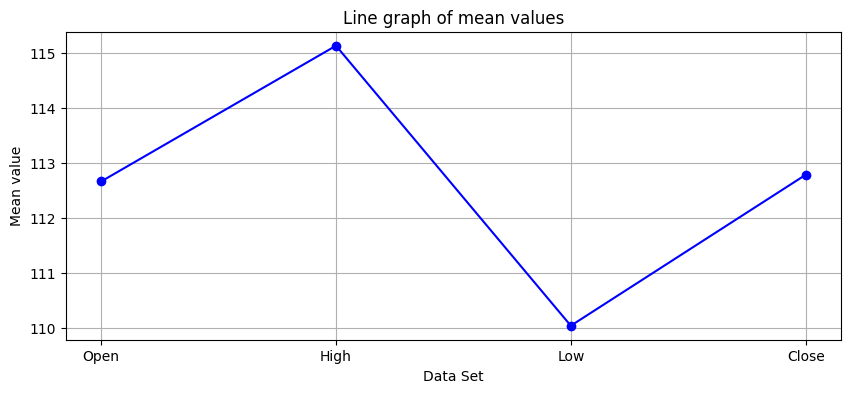

In [6]:
means=[meanopen,meanhigh,meanlow,meanclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(means)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(means)),['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mean value')
plt.title('Line graph of mean values')
plt.grid(True)
plt.show()

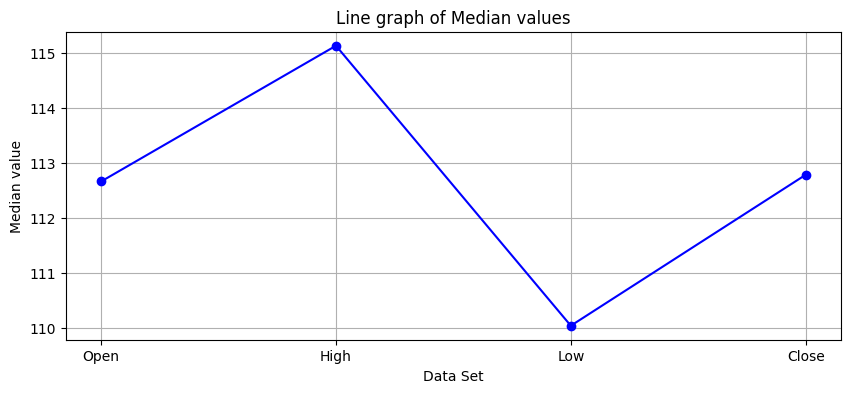

In [7]:
medians=[medianopen,medianhigh,medianlow,medianclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(medians)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(medians)),['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Median value')
plt.title('Line graph of Median values')
plt.grid(True)
plt.show()

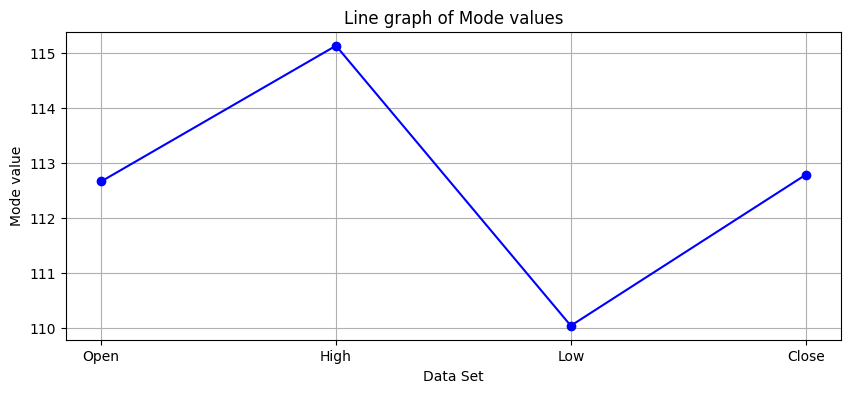

In [8]:
modes=[modeopen,modehigh,modelow,modeclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(modes)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(modes)),['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mode value')
plt.title('Line graph of Mode values')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

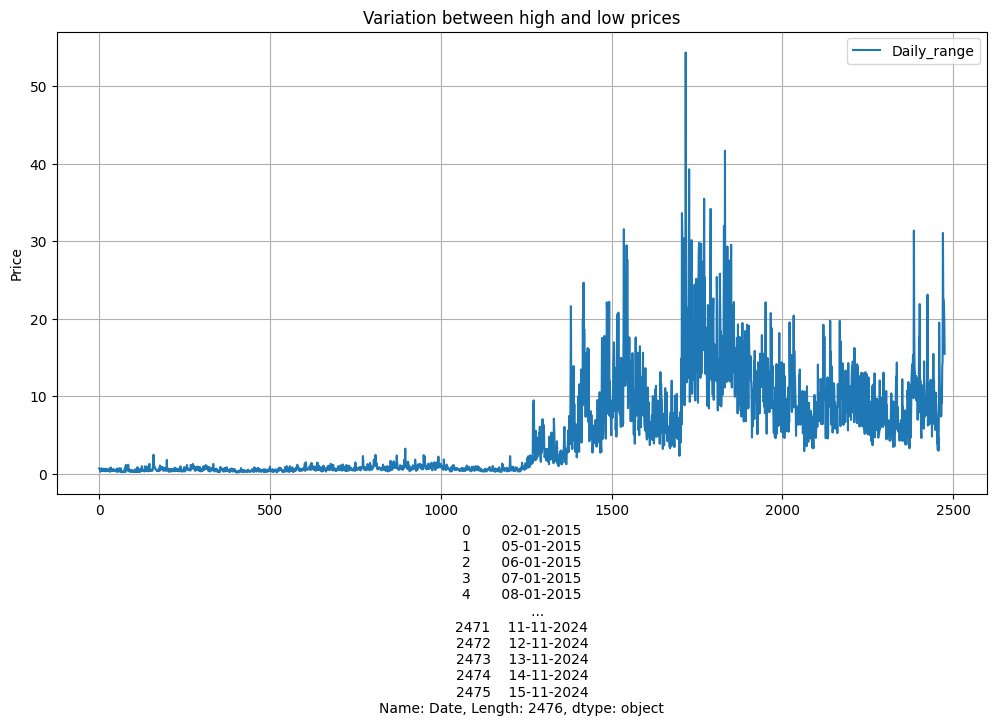

In [9]:
stock['Daily_range']=stock['High']-stock['Low']
test['Daily_range']=test['High']-stock['Low']
plot_cols=['Daily_range']

plt.figure(figsize=(12,6))
stock[plot_cols].plot(kind='line',figsize=(12,6))
plt.xlabel(stock['Date'])
plt.ylabel('Price')

if len(plot_cols)==2:
    plt.lines[0].set_label('High')
    plt.lines[1].set_label('Low')

plt.title("Variation between high and low prices")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
stock.head()

,Date,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range
0,02-01-2015,14.62,14.86,14.88,14.22,71.47,-0.0142,14.30,0.66
1,05-01-2015,14.01,14.30,14.43,13.81,80.53,-0.0417,14.00,0.62
2,06-01-2015,14.09,14.00,14.28,13.61,93.93,0.0057,14.22,0.67
3,07-01-2015,14.06,14.22,14.32,13.99,44.53,-0.0021,14.19,0.33
4,08-01-2015,14.04,14.19,14.25,14.00,51.64,-0.0014,13.93,0.25


Change the date to some other format since we can't apply the corr() function on date with all the others

In [11]:
stock.set_index(['Date'],inplace=True)
test.set_index(['Date'],inplace=True)

Volatility (usually denoted by "σ") is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.

In [12]:
stock['Volatility']=(stock['High']-stock['Low'])/stock['Open']
test['Volatility']=(test['High']-test['Low'])/test['Open']
stock

,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility
Date,,,,,,,,,
02-01-2015,14.62,14.86,14.88,14.22,71.47,-0.0142,14.30,0.66,0.044415
05-01-2015,14.01,14.30,14.43,13.81,80.53,-0.0417,14.00,0.62,0.043357
06-01-2015,14.09,14.00,14.28,13.61,93.93,0.0057,14.22,0.67,0.047857
07-01-2015,14.06,14.22,14.32,13.99,44.53,-0.0021,14.19,0.33,0.023207
08-01-2015,14.04,14.19,14.25,14.00,51.64,-0.0014,13.93,0.25,0.017618
...,...,...,...,...,...,...,...,...,...
11-11-2024,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64,0.065377
12-11-2024,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53,0.065735
13-11-2024,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10,0.065803


In [13]:
# stock['Volatility'].loc[-1]

The below code is shifing the volatility since 

In [14]:
stock['Volatility']=stock['Volatility'].shift(1)
test['Volatility']=test['Volatility'].shift(1)
stock

,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility
Date,,,,,,,,,
02-01-2015,14.62,14.86,14.88,14.22,71.47,-0.0142,14.30,0.66,NaN
05-01-2015,14.01,14.30,14.43,13.81,80.53,-0.0417,14.00,0.62,0.044415
06-01-2015,14.09,14.00,14.28,13.61,93.93,0.0057,14.22,0.67,0.043357
07-01-2015,14.06,14.22,14.32,13.99,44.53,-0.0021,14.19,0.33,0.047857
08-01-2015,14.04,14.19,14.25,14.00,51.64,-0.0014,13.93,0.25,0.023207
...,...,...,...,...,...,...,...,...,...
11-11-2024,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64,0.103798
12-11-2024,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53,0.065377
13-11-2024,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10,0.065735


In [15]:
correlation=stock.corr()
correlation

,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility
Price,1.000000,0.998977,0.999545,0.999592,-0.076105,0.019542,0.999510,0.832658,0.193644
Open,0.998977,1.000000,0.999635,0.999518,-0.077589,-0.007794,0.998367,0.835597,0.193876
High,0.999545,0.999635,1.000000,0.999524,-0.072264,0.004622,0.999055,0.842181,0.197971
Low,0.999592,0.999518,0.999524,1.000000,-0.082255,0.005861,0.999092,0.825140,0.188944
Vol.(Millions),-0.076105,-0.077589,-0.072264,-0.082255,1.000000,0.097484,-0.075723,0.114303,0.430191
Change,0.019542,-0.007794,0.004622,0.005861,0.097484,1.000000,0.021021,-0.017789,-0.000777
Close,0.999510,0.998367,0.999055,0.999092,-0.075723,0.021021,1.000000,0.832426,0.194488
Daily_range,0.832658,0.835597,0.842181,0.825140,0.114303,-0.017789,0.832426,1.000000,0.322801
Volatility,0.193644,0.193876,0.197971,0.188944,0.430191,-0.000777,0.194488,0.322801,1.000000


Iterating to get the p,d,q values and choosing the set with least AIC

In [16]:
import warnings
warnings.filterwarnings("ignore")

import itertools
p=q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))

store={}
for param in pdq:
    try:
        model_arima=sm.tsa.arima.ARIMA(stock.Close,order=param)
        model_arima_fit=model_arima.fit()
        store[param]=model_arima_fit.aic
        # print(param,model_arima_fit.aic)
    except:
        continue

sorted_dict=dict(sorted(store.items(),key=lambda item:item[1]))
print(sorted_dict)

{(6, 1, 6): np.float64(16122.84433815653), (6, 1, 7): np.float64(16123.13114844681), (7, 1, 7): np.float64(16126.286657500845), (5, 1, 7): np.float64(16126.91309822557), (2, 1, 6): np.float64(16133.794424818761), (3, 1, 4): np.float64(16135.276922006873), (6, 1, 5): np.float64(16136.166047341932), (3, 1, 5): np.float64(16136.367698662585), (5, 1, 6): np.float64(16136.783824009559), (5, 1, 3): np.float64(16137.330178463213), (4, 1, 5): np.float64(16138.12455502449), (4, 1, 6): np.float64(16138.334658844613), (4, 1, 4): np.float64(16138.392740866984), (6, 1, 3): np.float64(16138.78869389329), (2, 1, 7): np.float64(16138.873983044134), (3, 1, 7): np.float64(16139.36112610235), (4, 1, 7): np.float64(16139.392051567858), (6, 1, 2): np.float64(16140.055939824819), (7, 1, 5): np.float64(16140.163302478853), (2, 1, 5): np.float64(16140.897531719937), (3, 1, 6): np.float64(16141.597531683934), (7, 1, 2): np.float64(16141.61502099573), (7, 1, 4): np.float64(16142.310405402211), (7, 1, 3): np.flo

In [17]:
endog=stock['Close']
exog=sm.add_constant(stock[['Open','High','Low']])

mod=sm.tsa.statespace.SARIMAX(endog=endog,exog=exog,order=(3,1,5), seasonal_order=(1,0,0,5))
model_fit=mod.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2476
Model:             SARIMAX(3, 1, 5)x(1, 0, [], 5)   Log Likelihood               -6791.168
Date:                            Wed, 01 Jan 2025   AIC                          13610.337
Time:                                    19:17:12   BIC                          13691.732
Sample:                                         0   HQIC                         13639.902
                                           - 2476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.022e-09   2.12e-10    -23.640      0.000   -5.44e-09   -4.61e-09
Open          -0.8686      0.015    -56.252      0.000      -0.899      -0.838
High           0.9794      0.016     62.486      0.000       0.949       1.010
Low            0.8871      0.013     69.356      0.000       0.862       0.912
ar.L1         -1.2139      0.167     -7.278      0.000      -1.541      -0.887
ar.L2         -1.1281      0.069    -16.310      0.000      -1.264      -0.993
ar.L3         -0.7222      0.128     -5.662      0.000      -0.972      -0.472
ma.L1          0.2083      0.169      1.235      0.217      -0.122       0.539
ma.L2         -0.0936      0.124     -0.752      0.452      -0.337       0.150
ma.L3         -0.4688      0.080     -5.887      0.000      -0.625      -0.313
ma.L4         -0.6771      0.142     -4.779      0.000      -0.955      -0.399
ma.L5          0.0582      0.028      2.070      0.038       0.003       0.113
ar.S.L5       -0.0226      0.019     -1.166      0.244      -0.060       0.015
sigma2        14.0436      0.143     97.942      0.000      13.763      14.325
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21409.35
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             408.31   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+25. Standard errors may be unstable.
"""

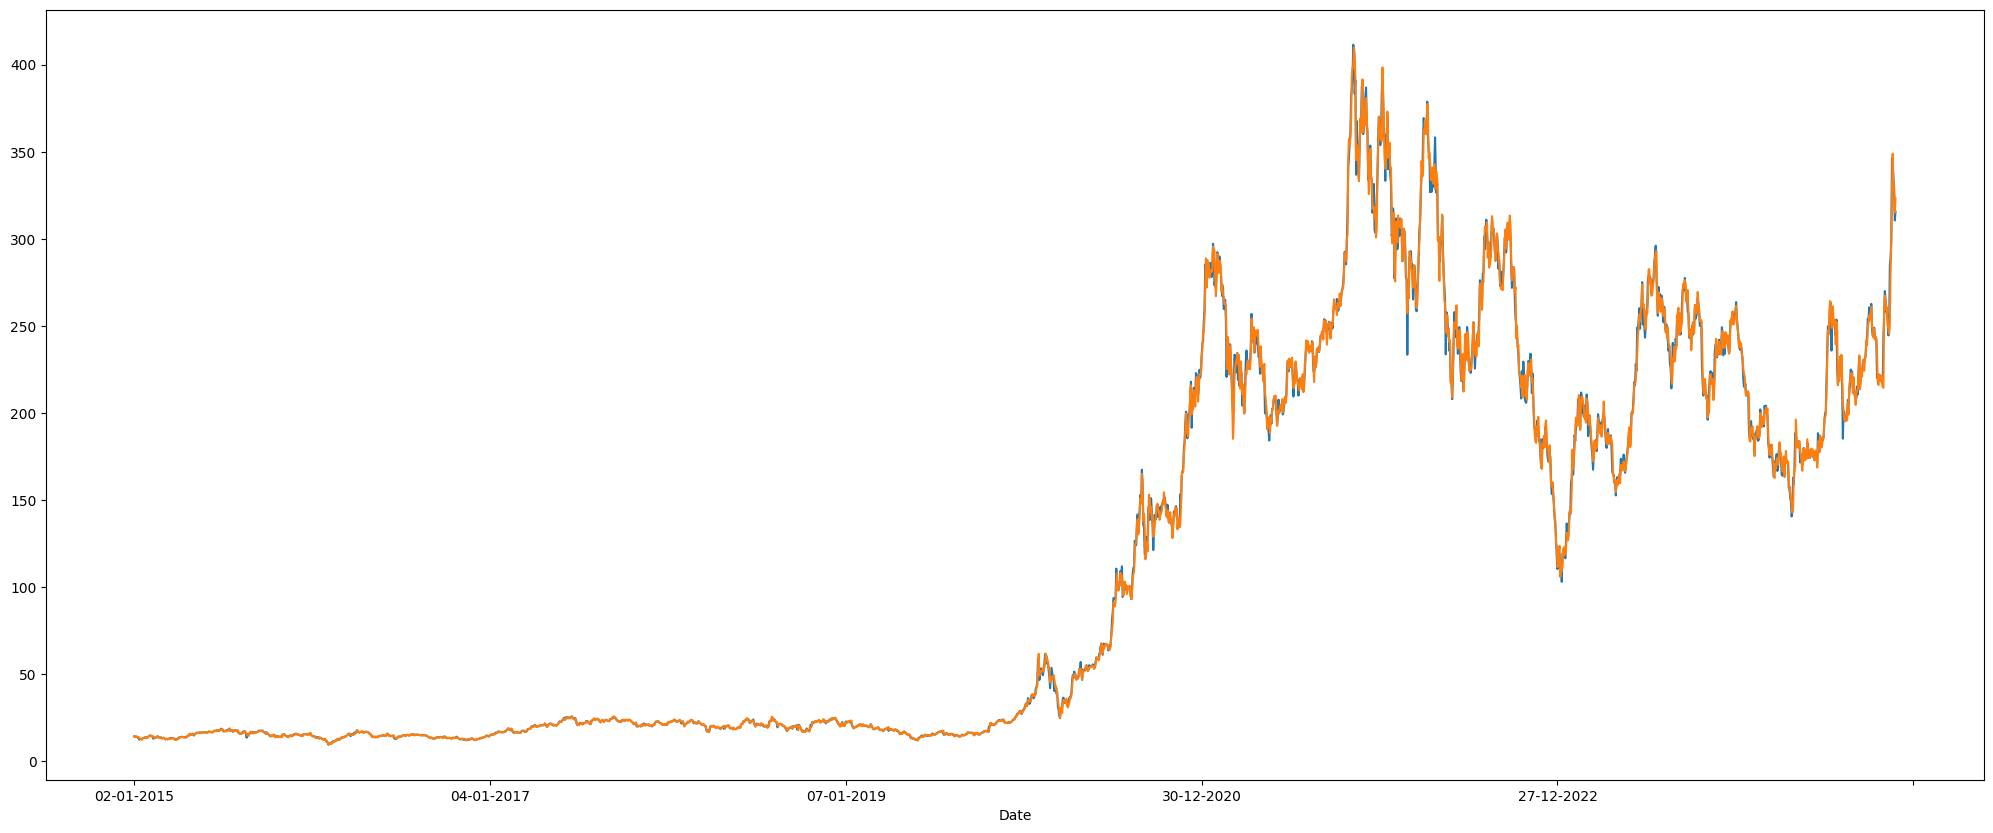

In [18]:
stock['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [19]:
predict=model_fit.predict(start=0,end=len(stock)-1,exog=sm.add_constant(stock[['Open','High','Low']]))
stock['Predicted']=predict.values
stock.tail(5)

,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility,Predicted
Date,,,,,,,,,,
11-11-2024,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64,0.103798,348.893253
12-11-2024,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53,0.065377,328.823410
13-11-2024,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10,0.065735,330.685956
14-11-2024,311.18,327.69,329.98,310.37,120.73,-0.0577,310.57,19.61,0.065803,314.999922
15-11-2024,320.72,310.57,324.68,309.22,114.44,0.0307,315.60,15.46,0.059843,323.334578


In [20]:
stock['Residual']=abs(stock['Close']-stock['Predicted'])
stock.tail(5)

,Price,Open,High,Low,Vol.(Millions),Change,Close,Daily_range,Volatility,Predicted,Residual
Date,,,,,,,,,,,
11-11-2024,350.00,346.30,358.64,336.00,210.52,0.0896,342.74,22.64,0.103798,348.893253,6.153253
12-11-2024,328.49,342.74,345.84,323.31,155.73,-0.0615,335.85,22.53,0.065377,328.823410,7.026590
13-11-2024,330.24,335.85,344.60,322.50,125.41,0.0053,327.69,22.10,0.065735,330.685956,2.995956
14-11-2024,311.18,327.69,329.98,310.37,120.73,-0.0577,310.57,19.61,0.065803,314.999922,4.429922
15-11-2024,320.72,310.57,324.68,309.22,114.44,0.0307,315.60,15.46,0.059843,323.334578,7.734578


In [21]:
MAE=stock['Residual'].sum()/len(stock)
MAPE=(abs(stock['Residual'])/stock['Close']).sum()*100/len(stock)
print("MAE: ",MAE)
print("MAPE: ",MAPE)

MAE:  1.8869686871214926
MAPE:  1.5742806651874035
